# Data Analysis
## 2. Load the dataset.


In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('titanic.csv')

## 4. Perform descriptive statistics on the dataset.


In [292]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 5. Handle the Missing values.


In [293]:
missing_count=df.isnull().sum()
missing_count[missing_count>0.0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [294]:
# Handling embarked missing data
df['embarked'].fillna('S',inplace=True)
df['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [295]:
# Handling the missing deck
# The percentage missing data is very high, so it will be best if we ignore this feature

df.drop('deck',axis=1,inplace=True)
# Check missing value
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [296]:
# Handling age missing data and missing embark_town data
print('Average age of passangers : {}'.format(df.age.mean()))
df.dropna(inplace=True)

Average age of passangers : 29.69911764705882


In [297]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

## 6. Find the outliers and replace the outliers


In [298]:
num_df = df[['age','fare']]

num_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,age,fare
count,712.000000,712.000000
mean,29.642093,34.567251
std,14.492933,52.938648
min,0.420000,0.000000
25%,20.000000,8.050000
50%,28.000000,15.645850
75%,38.000000,33.000000
90%,50.000000,79.200000
95%,56.000000,120.000000
99%,65.890000,262.375000


In [299]:
# The jump at 99 percentile shows outliners in fare feature
q = df["fare"].quantile(0.99)
df = df[df['fare'] < q]
df['fare'].describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    703.000000
mean      30.580577
std       37.441624
min        0.000000
25%        8.050000
50%       15.245800
75%       31.331250
90%       77.824140
95%      108.900000
99%      211.337500
max      247.520800
Name: fare, dtype: float64

## 7. Check for Categorical columns and perform encoding.


In [300]:
sexdic={'male': 0 , 'female': 1}
df['sex'] = df['sex'].map(sexdic)
df["alone"] = df["alone"].map({"True":1, "False":0})

dummy = pd.get_dummies(df[['embarked']])
df = pd.concat([df, dummy], axis=1)
df = df.drop('embarked', 1)
df = df.drop('adult_male', 1)

/tmp/ipykernel_23885/4010019328.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('embarked', 1)
/tmp/ipykernel_23885/4010019328.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('adult_male', 1)


## 3. Perform Below Visualizations.
### Univariate Analysis


In [301]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,embark_town,alive,alone,embarked_C,embarked_Q,embarked_S
0,0,3,0,22.0,1,0,7.2500,Third,man,Southampton,no,NaN,0,0,1
1,1,1,1,38.0,1,0,71.2833,First,woman,Cherbourg,yes,NaN,1,0,0
2,1,3,1,26.0,0,0,7.9250,Third,woman,Southampton,yes,NaN,0,0,1
3,1,1,1,35.0,1,0,53.1000,First,woman,Southampton,yes,NaN,0,0,1
4,0,3,0,35.0,0,0,8.0500,Third,man,Southampton,no,NaN,0,0,1


survived


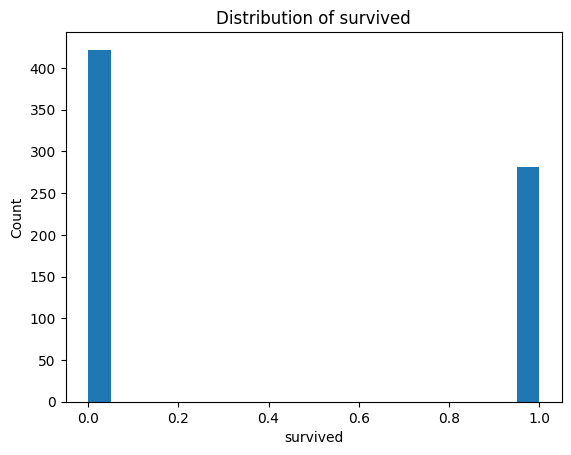

pclass


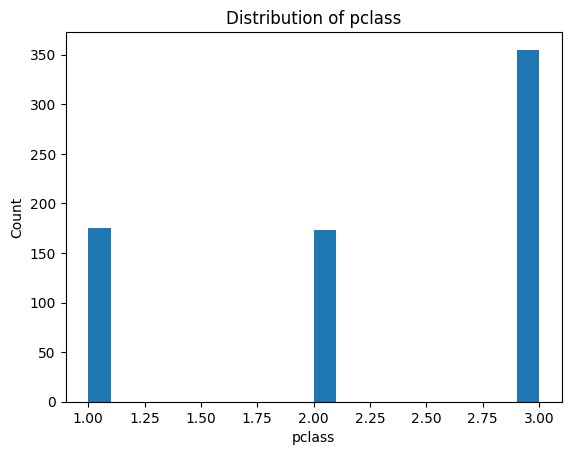

sex


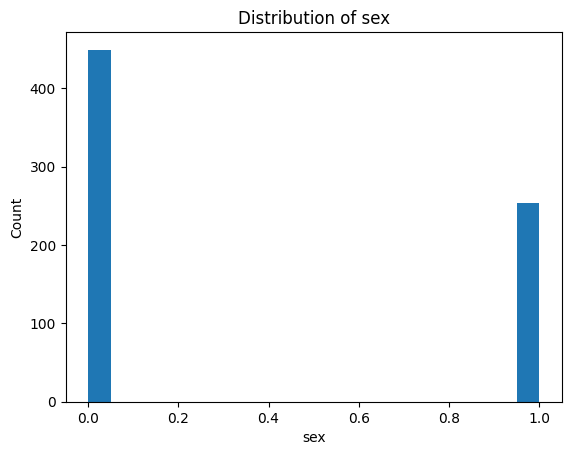

age


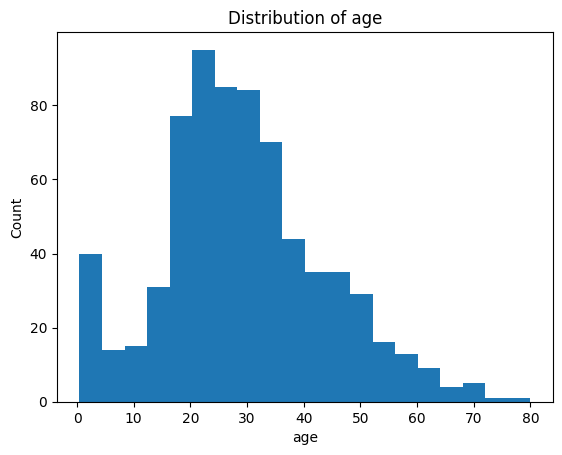

sibsp


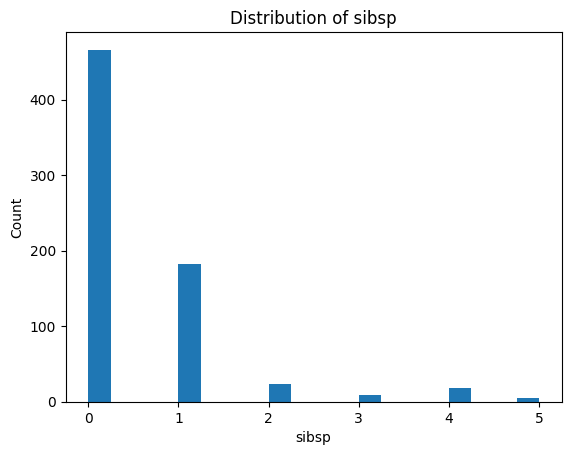

parch


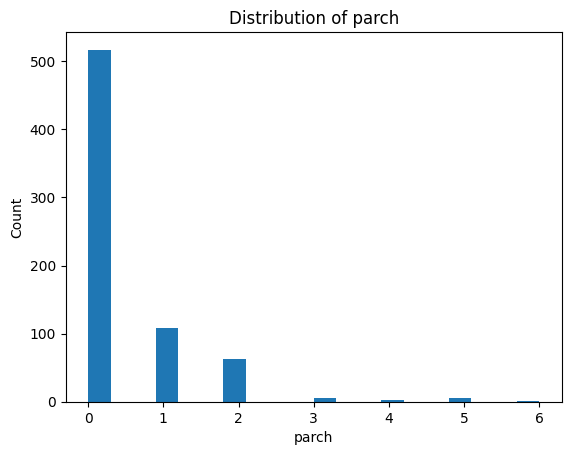

fare


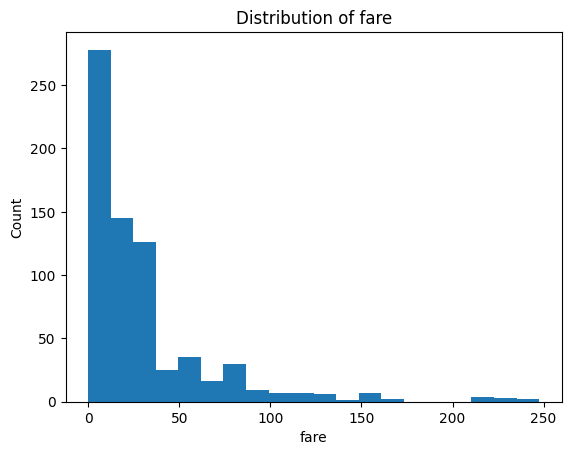

class


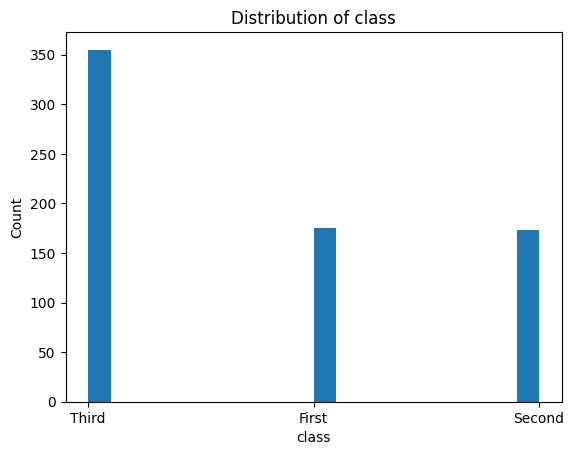

who


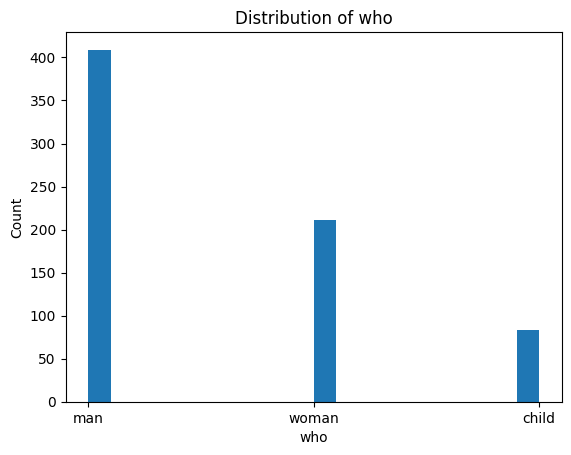

embark_town


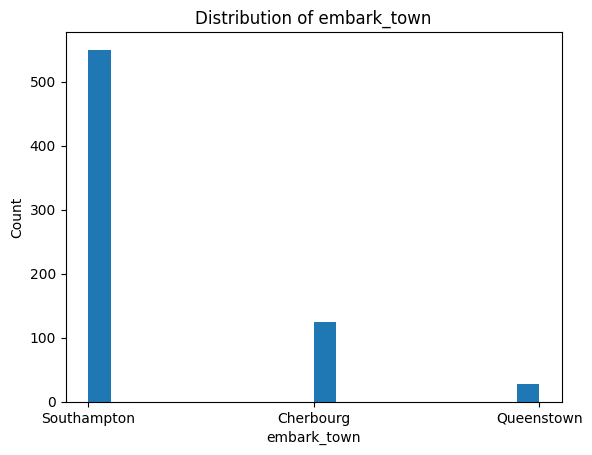

alive


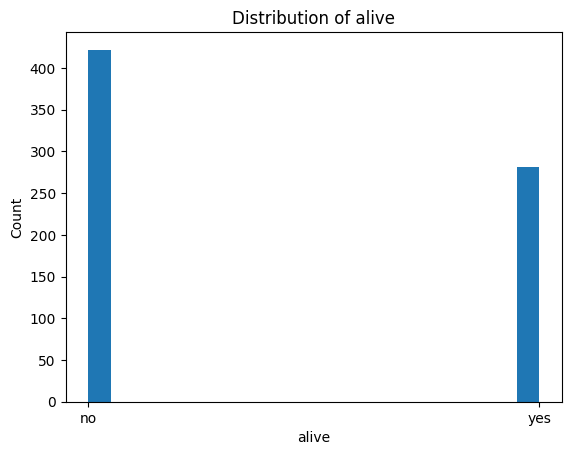

alone


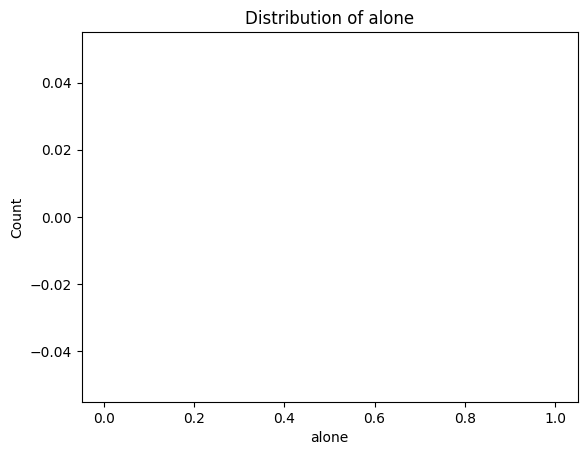

embarked_C


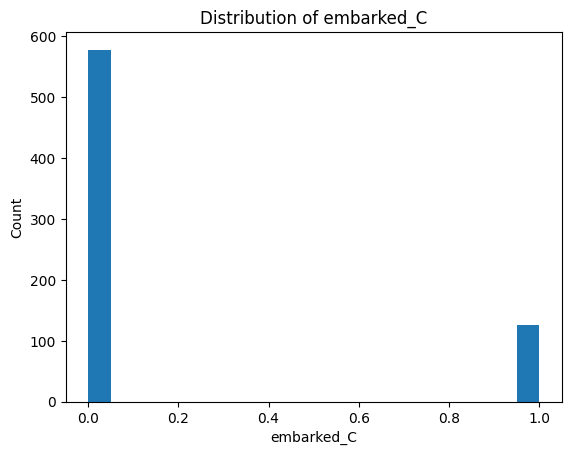

embarked_Q


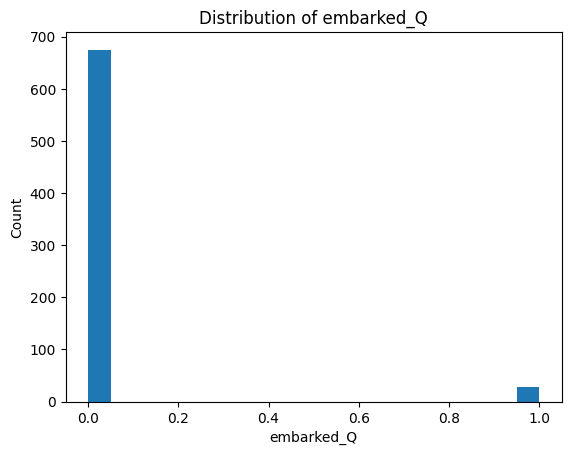

embarked_S


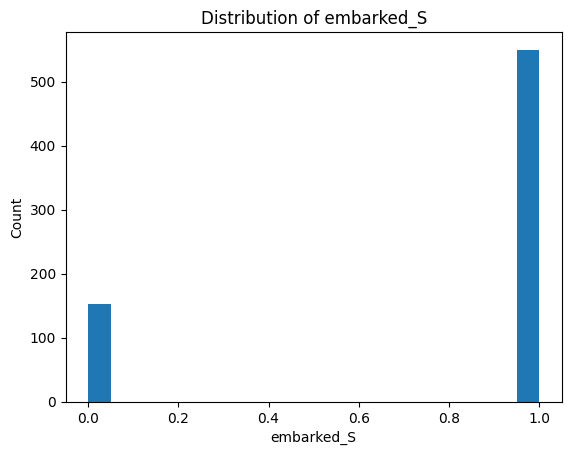

In [302]:
for i in df.columns:
    print(i)
    plt.hist(df[str(i)].dropna(), bins=20)
    plt.xlabel(str(i))
    plt.ylabel('Count')
    plt.title(f'Distribution of {str(i)}')
    plt.show()

### Bi - Variate Analysis


<AxesSubplot:xlabel='sex', ylabel='age'>

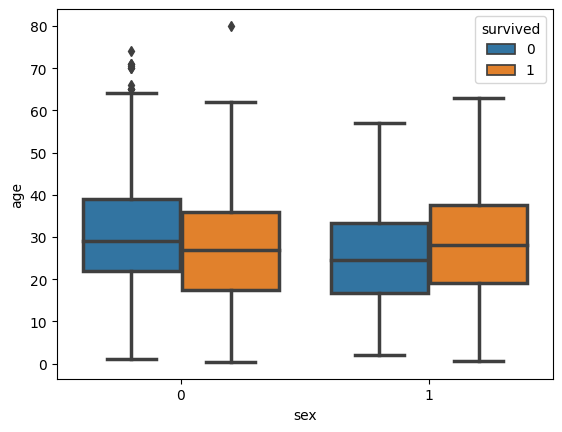

In [303]:
sns.boxplot(x="sex", y="age", hue="survived",data=df, linewidth=2.5)

### Multi - Variate Analysis


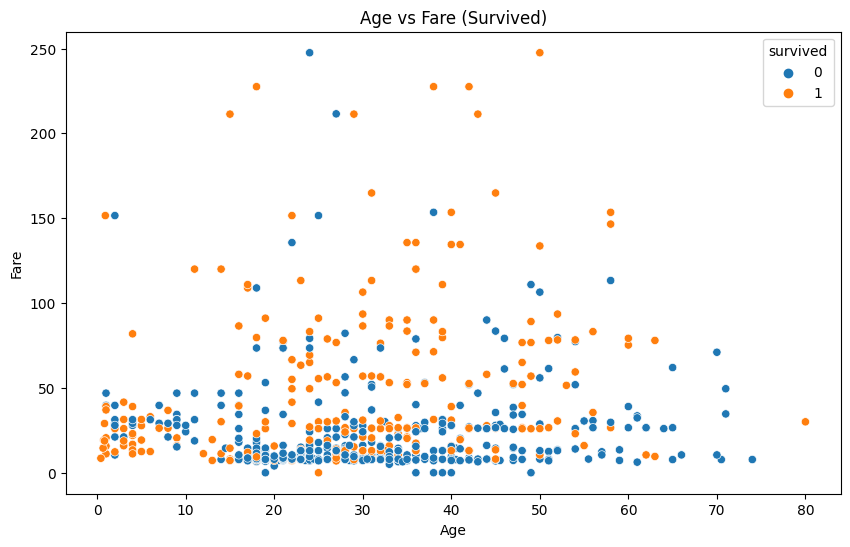

In [304]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='fare', hue='survived', data=df)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare (Survived)')
plt.show()

## 8. Split the data into dependent and independent variables.


In [305]:
X = df.drop('survived',axis=1)
y = df['survived']

## 9. Scale the independent variables


In [306]:
scaler = StandardScaler()
X[['age','fare']] = scaler.fit_transform(X[['age','fare']])
X.head()

,pclass,sex,age,sibsp,parch,fare,class,who,embark_town,alive,alone,embarked_C,embarked_Q,embarked_S
0,3,0,-0.526486,1,0,-0.623562,Third,man,Southampton,no,NaN,0,0,1
1,1,1,0.577490,1,0,1.087872,First,woman,Cherbourg,yes,NaN,1,0,0
2,3,1,-0.250492,0,0,-0.605521,Third,woman,Southampton,yes,NaN,0,0,1
3,1,1,0.370495,1,0,0.601882,First,woman,Southampton,yes,NaN,0,0,1
4,3,0,0.370495,0,0,-0.602181,Third,man,Southampton,no,NaN,0,0,1


## 10. Split the data into training and testing


In [307]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)